In [1]:
FFMPEG_BIN = "ffmpeg"

In [2]:
import subprocess as sp
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import skvideo.io

In [4]:
command = [ FFMPEG_BIN,
            '-i', r"/home/sergey/MAI/Multimedia/Мультимедиа_2й_семестр/3/for_msu4.avi",
            '-f', 'image2pipe','-pix_fmt', 'rgb24', '-vcodec', 'rawvideo', '-']
pipe1 = sp.Popen(command, stdout = sp.PIPE, bufsize=10**8)

command = [ FFMPEG_BIN,
            '-i', r"/home/sergey/MAI/Multimedia/Мультимедиа_2й_семестр/3/for_msu_compr.avi",
            '-f', 'image2pipe','-pix_fmt', 'rgb24', '-vcodec', 'rawvideo', '-']
pipe2 = sp.Popen(command, stdout = sp.PIPE, bufsize=10**8)

diffs = []
for i in range(1344):
    raw_image = pipe1.stdout.read(900*506*3)
    image =  np.frombuffer(raw_image, dtype='uint8')
    image = image.reshape((506,900,3))

    raw_image2 = pipe2.stdout.read(900*506*3)
    image2 =  np.frombuffer(raw_image2, dtype='uint8')
    image2 = image2.reshape((506,900, 3))
    
    image_diff = np.abs(image.astype(int) - image2.astype(int))
    diffs.append(image_diff.max())
    
    if i == 725:
        i1, i2, d = image, image2, image_diff
#     break
    

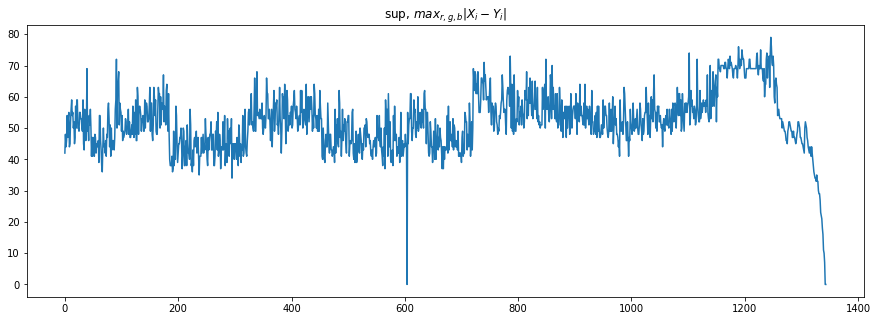

In [7]:
plt.figure(figsize=(15, 5))
plt.title('sup, $max_{r, g, b}|X_i-Y_i|$')
plt.plot(diffs)

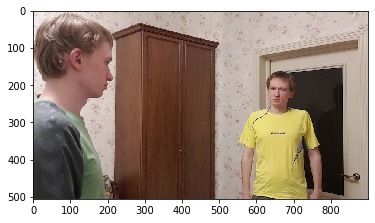

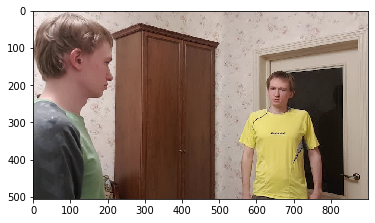

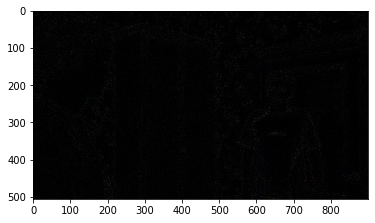

In [8]:
plt.imshow(i1)
plt.show()
plt.imshow(i2)
plt.show()
plt.imshow(d)

In [10]:
dd = i1.astype(int) - i2.astype(int)

In [11]:
dd.shape

(506, 900, 3)

In [14]:
dd[:,:,0].flatten()

array([ 9, -1, -3, ...,  0, -4,  1])

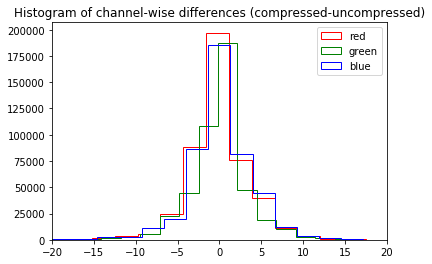

In [27]:
plt.hist(dd[:,:,0].flatten(), bins=40, color='red', label='red', histtype='step')
plt.hist(dd[:,:,1].flatten(), bins=40, color='green', label='green', histtype='step')
plt.hist(dd[:,:,2].flatten(), bins=40, color='blue', label='blue', histtype='step')
plt.xlim((-20, 20))
plt.title('Histogram of channel-wise differences (compressed-uncompressed)')
plt.legend()
plt.show()

In [12]:
v1 = skvideo.io.vread(r"/home/sergey
                      
                      
                      /MAI/Multimedia/Мультимедиа_2й_семестр/3/for_msu4.avi")

In [ ]:
v2 = skvideo.io.vread(r"C:\Users\micro\OneDrive\Documents\Likharev\MAI\Informatic\Multi\2-й_сем\3\20200416_180123_2.mxf")

In [ ]:
plt.imshow(v2[0])